In [69]:
import random
import numpy as np
import pandas as pd
import math
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import KMeans, DBSCAN
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
# from sklearn_extra.cluster import KMedoids
# import umap
import umap.umap_ as umap

from tqdm.notebook import tqdm_notebook
import seaborn as sns
from matplotlib import gridspec
import matplotlib.pyplot as plt
import plotnine as p9
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [86]:
# —á–∏—Å–ª–æ–≤—ã–µ —Ñ–∏—á–∏ + —Ç–µ–∫—Å—Ç–æ–≤—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏
embeddings = pd.read_csv('../data/embeddings.csv')
embeddings.sample()

MATCHED_VARIABLE_SRC_mean  CLIENT_USERAGENT_min  \
34421                     4608.9                    37   

       MATCHED_VARIABLE_VALUE_max  MATCHED_VARIABLE_VALUE_median  \
34421                       22302                           41.0   

       CLIENT_USERAGENT_max  MATCHED_VARIABLE_SRC_median  \
34421                 39905                         55.0   

       MATCHED_VARIABLE_NAME_mode  CLIENT_USERAGENT_median  \
34421                          19                     52.5   

       MATCHED_VARIABLE_NAME_sum  MATCHED_VARIABLE_VALUE_mean  \
34421                     366418                  2505.446809   

       MATCHED_VARIABLE_SRC_max  MATCHED_VARIABLE_NAME_min  \
34421                     45604                         19   

       MATCHED_VARIABLE_SRC_count  CLIENT_USERAGENT_mode  bad_useragent  \
34421                        1959                     41              0   

       MATCHED_VARIABLE_SRC_sum  MATCHED_VARIABLE_NAME_std  bad_resp_code  \
34421                     46089               12246.938686              0   

       bad_src  MATCHED_VARIABLE_SRC_mode  RESPONSE_CODE  \
34421        0                         41            302   

       variable_src_in_name  REQUEST_SIZE  MATCHED_VARIABLE_VALUE_sum  \
34421                     1          2984                      117756   

       MATCHED_VARIABLE_VALUE_min  MATCHED_VARIABLE_VALUE_count  \
34421                          17                             1   

       MATCHED_VARIABLE_VALUE_mode  var_name_eql_value  bad_name  \
34421                           17                   0         0   

       MATCHED_VARIABLE_SRC_min  MATCHED_VARIABLE_VALUE_std  \
34421                        41                 5493.518633   

       MATCHED_VARIABLE_NAME_count  MATCHED_VARIABLE_SRC_std  \
34421                          129              13665.034976   

       CLIENT_USERAGENT_mean  bad_value  bad_req_size  CLIENT_USERAGENT_sum  \
34421                 7268.0          0             0                247112   

       CLIENT_USERAGENT_count  MATCHED_VARIABLE_NAME_max  \
34421                    1225                      46748   

       MATCHED_VARIABLE_NAME_mean  CLIENT_USERAGENT_std  unknown_event  \
34421                 5551.787879          13173.545967              0   

       MATCHED_VARIABLE_NAME_median  
34421                          73.0

In [87]:
embeddings.sample()

MATCHED_VARIABLE_SRC_mean  CLIENT_USERAGENT_min  \
26930                     8867.6                    13   

       MATCHED_VARIABLE_VALUE_max  MATCHED_VARIABLE_VALUE_median  \
26930                       30248                           87.0   

       CLIENT_USERAGENT_max  MATCHED_VARIABLE_SRC_median  \
26930                 33825                         56.0   

       MATCHED_VARIABLE_NAME_mode  CLIENT_USERAGENT_median  \
26930                          56                     71.0   

       MATCHED_VARIABLE_NAME_sum  MATCHED_VARIABLE_VALUE_mean  \
26930                      88676                  5257.551724   

       MATCHED_VARIABLE_SRC_max  MATCHED_VARIABLE_NAME_min  \
26930                     45604                         41   

       MATCHED_VARIABLE_SRC_count  CLIENT_USERAGENT_mode  bad_useragent  \
26930                        4011                     18              0   

       MATCHED_VARIABLE_SRC_sum  MATCHED_VARIABLE_NAME_std  bad_resp_code  \
26930                     88676               17640.622456              0   

       bad_src  MATCHED_VARIABLE_SRC_mode  RESPONSE_CODE  \
26930        0                         56            200   

       variable_src_in_name  REQUEST_SIZE  MATCHED_VARIABLE_VALUE_sum  \
26930                     1           866                      152469   

       MATCHED_VARIABLE_VALUE_min  MATCHED_VARIABLE_VALUE_count  \
26930                          17                             1   

       MATCHED_VARIABLE_VALUE_mode  var_name_eql_value  bad_name  \
26930                           19                   0         0   

       MATCHED_VARIABLE_SRC_min  MATCHED_VARIABLE_VALUE_std  \
26930                        41                 7875.982573   

       MATCHED_VARIABLE_NAME_count  MATCHED_VARIABLE_SRC_std  \
26930                         3821              17640.622456   

       CLIENT_USERAGENT_mean  bad_value  bad_req_size  CLIENT_USERAGENT_sum  \
26930            4805.527778          0             0                345998   

       CLIENT_USERAGENT_count  MATCHED_VARIABLE_NAME_max  \
26930                    1806                      45604   

       MATCHED_VARIABLE_NAME_mean  CLIENT_USERAGENT_std  unknown_event  \
26930                      8867.6           8256.663232              0   

       MATCHED_VARIABLE_NAME_median  
26930                          56.0

In [88]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(embeddings)
dataset_scaled.shape

(57811, 43)

### Dimensionality Reduction with UMAP

In [89]:
%%time
emb = umap.UMAP(random_state=12).fit(dataset_scaled)
umap_embedding = emb.embedding_


results = pd.DataFrame(
                        {'x': umap_embedding[:,0],
                         'y':  umap_embedding[:,1],
                        })

CPU times: user 4min 18s, sys: 2.73 s, total: 4min 21s
Wall time: 1min 7s


In [90]:
UMAP_2D_data = pd.DataFrame()
UMAP_2D_data['x'] = umap_embedding[:,0]
UMAP_2D_data['y'] = umap_embedding[:,1]

UMAP_2D_data.to_csv('../data/UMAP_2D_data.csv', index=False)

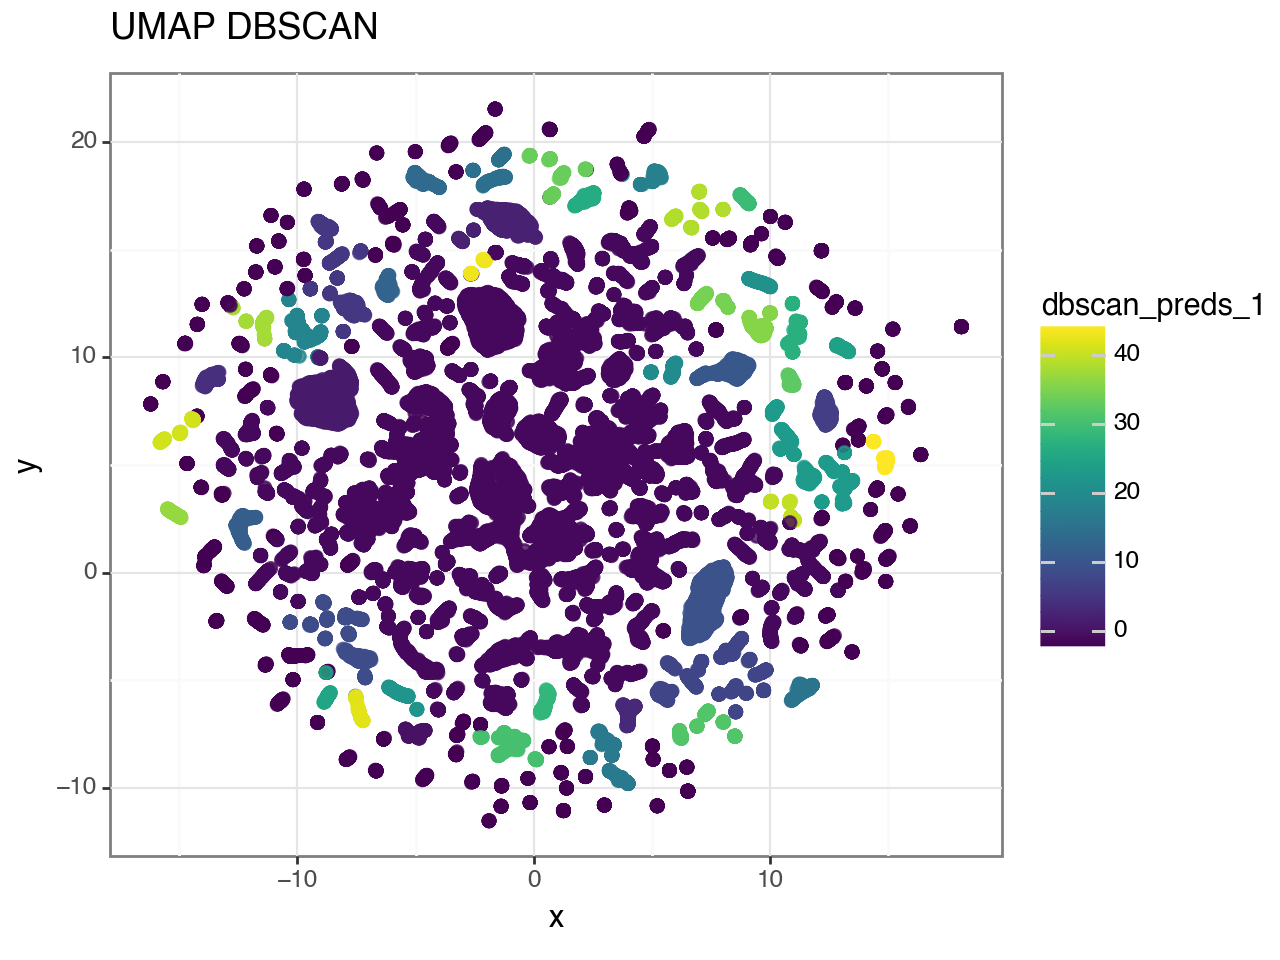

<Figure Size: (640 x 480)>

In [91]:
dbscan_clusterer_1 = DBSCAN(eps=0.95, min_samples=120).fit(umap_embedding)

dbscan_clusterer_2 = DBSCAN(eps=0.9, min_samples=150).fit(umap_embedding)

UMAP_2D_data["dbscan_preds_1"] = dbscan_clusterer_1.labels_
UMAP_2D_data["dbscan_preds_2"] = dbscan_clusterer_2.labels_

dbscan_plot_1 = (p9.ggplot(UMAP_2D_data, p9.aes(x='x', y='y', fill='dbscan_preds_1', color='dbscan_preds_1'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle('UMAP DBSCAN')
      + p9.theme_bw())

dbscan_plot_2 = (p9.ggplot(UMAP_2D_data, p9.aes(x='x', y='y', fill='dbscan_preds_2', color='dbscan_preds_2'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle('UMAP DBSCAN')
      + p9.theme_bw())



dbscan_plot_1

In [92]:
len(set(dbscan_clusterer_1.labels_))

45

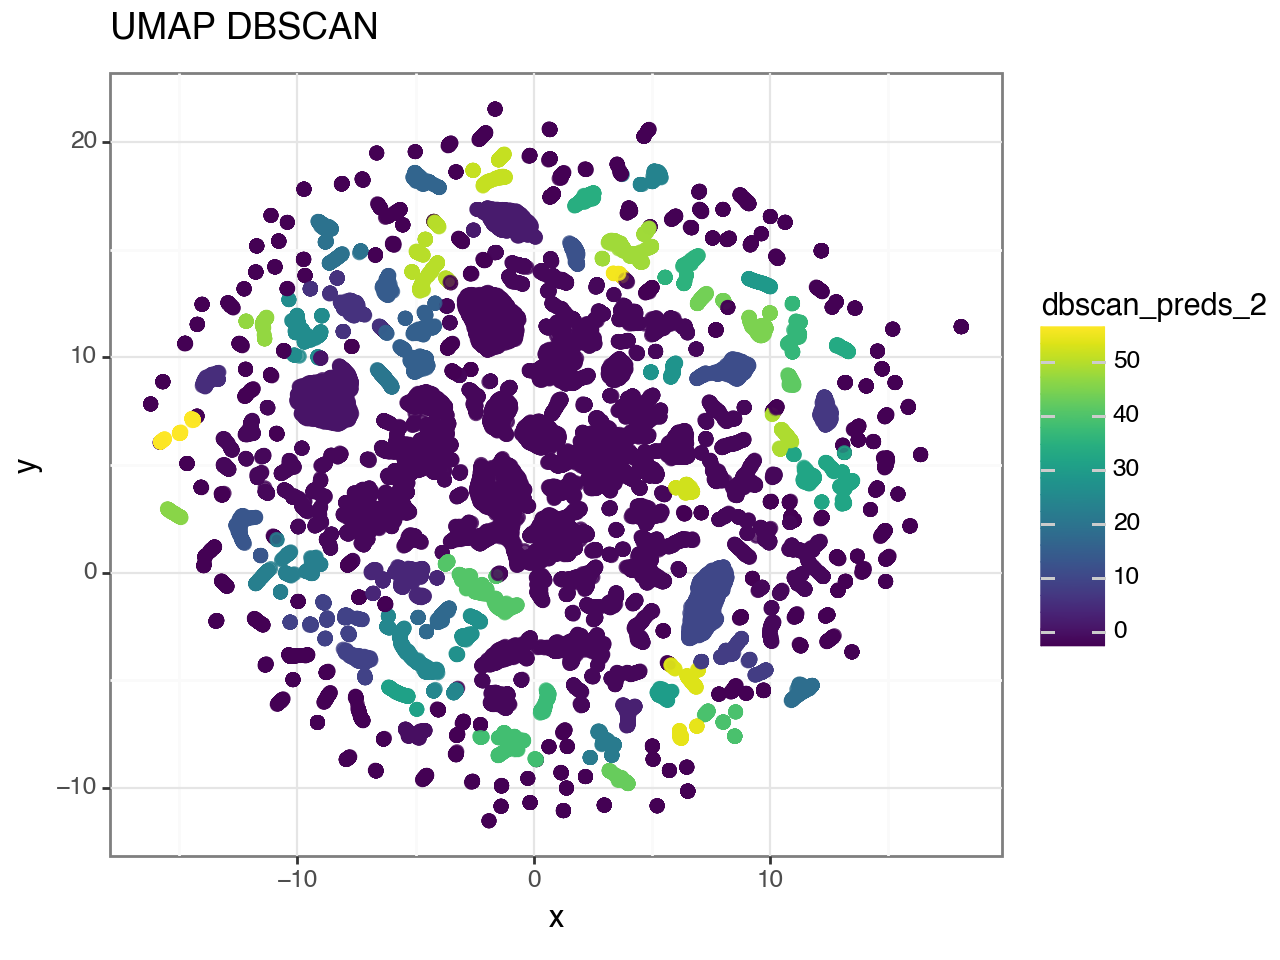

<Figure Size: (640 x 480)>

In [93]:
dbscan_plot_2

In [94]:
len(set(dbscan_clusterer_2.labels_))

57

In [85]:
embeddings.shape

(57811, 43)

In [96]:
embeddings['dbscan_cluster'] = dbscan_clusterer_2.labels_

embeddings[embeddings['dbscan_cluster'] == 0]['dbscan_cluster'].sample(5)

14786    0
44156    0
14440    0
51057    0
40579    0
Name: dbscan_cluster, dtype: int64

In [42]:
# dataset = pd.read_csv()

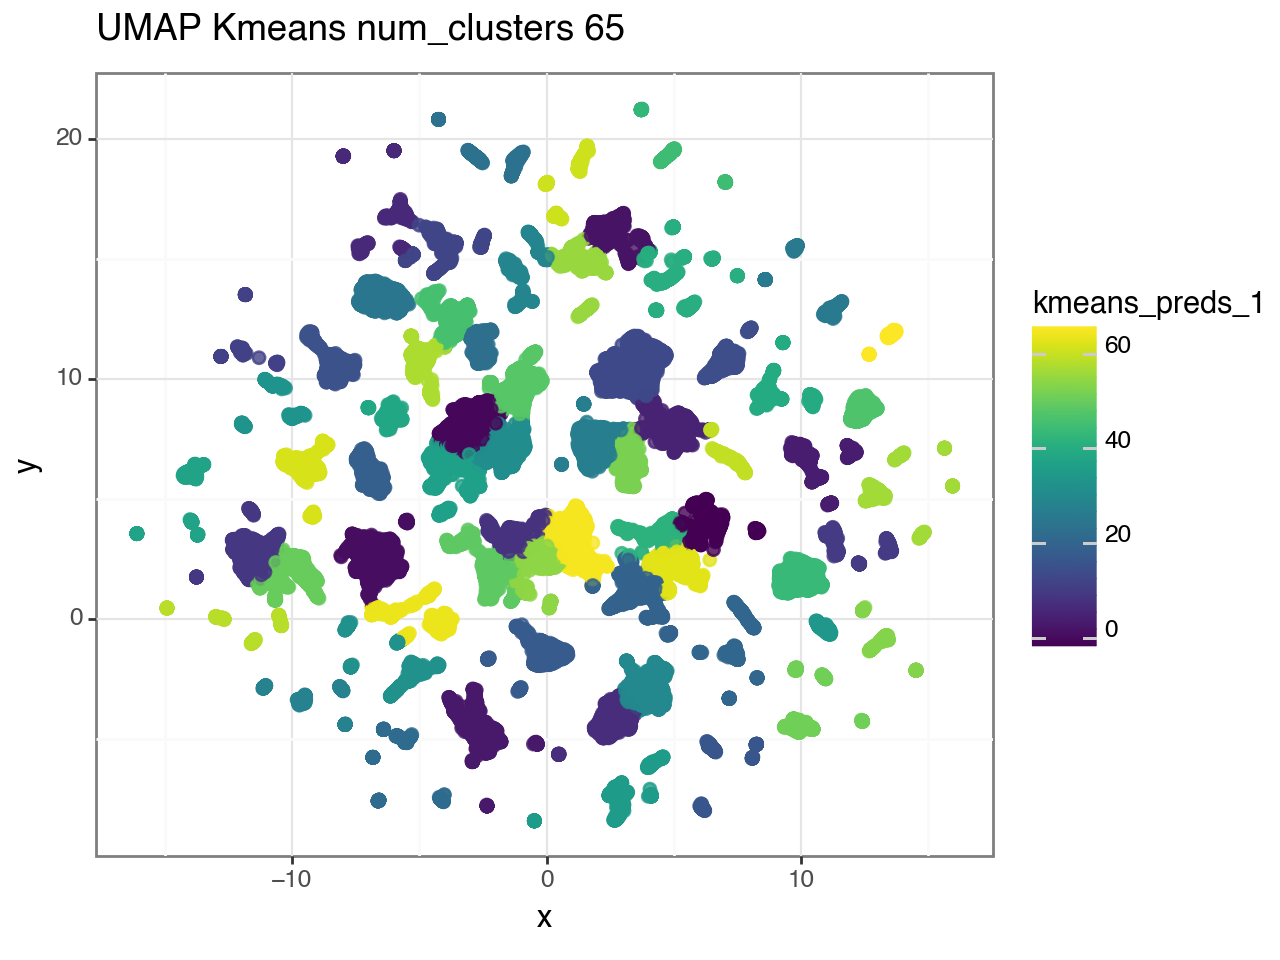

<Figure Size: (640 x 480)>

In [43]:
num_clusters_1 = 65
num_clusters_2 = 45
random_state = 32

kmeans_clusterer_1 = KMeans(n_clusters=num_clusters_1, init='k-means++',
                        verbose=0, random_state=random_state,
                        algorithm='auto').fit(umap_embedding)

kmeans_clusterer_2 = KMeans(n_clusters=num_clusters_2, init='k-means++',
                        verbose=0, random_state=random_state,
                        algorithm='auto').fit(umap_embedding)


UMAP_2D_data["kmeans_preds_1"] = kmeans_clusterer_1.labels_
UMAP_2D_data["kmeans_preds_2"] = kmeans_clusterer_2.labels_

kmeans_plot_1 = (p9.ggplot(UMAP_2D_data, p9.aes(x='x', y='y', fill='kmeans_preds_1', color='kmeans_preds_1'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle(f'UMAP Kmeans num_clusters {num_clusters_1}')
      + p9.theme_bw())

kmeans_plot_2 = (p9.ggplot(UMAP_2D_data, p9.aes(x='x', y='y', fill='kmeans_preds_2', color='kmeans_preds_2'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle(f'UMAP Kmeans num_clusters {num_clusters_2}')
      + p9.theme_bw())

kmeans_plot_1

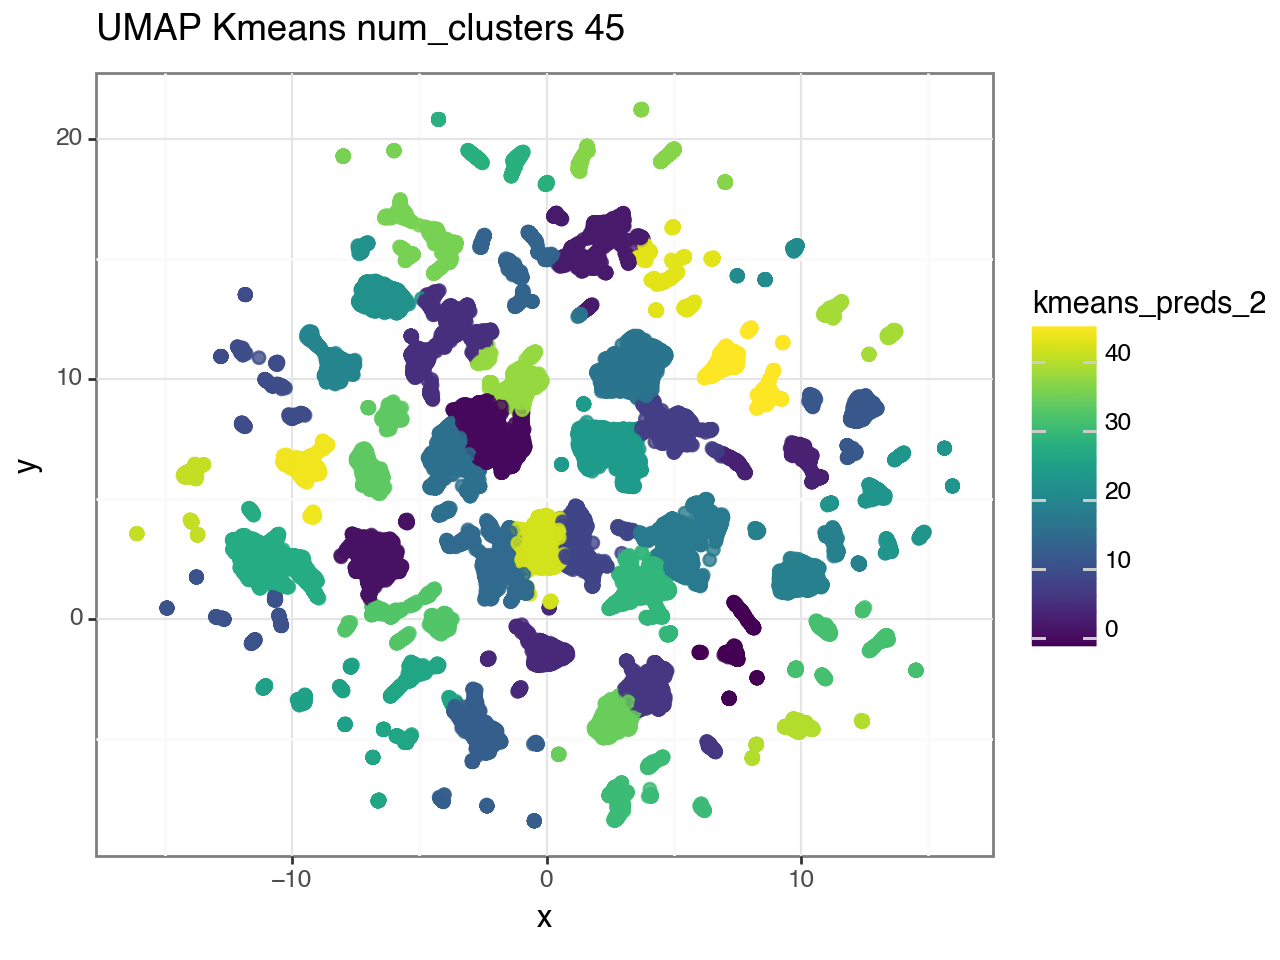

<Figure Size: (640 x 480)>

In [44]:
kmeans_plot_2

### Dimensionality Reduction with PCA

In [32]:
%%time
n_components = 10
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(dataset_scaled)

CPU times: user 19.4 s, sys: 767 ms, total: 20.2 s
Wall time: 2.77 s


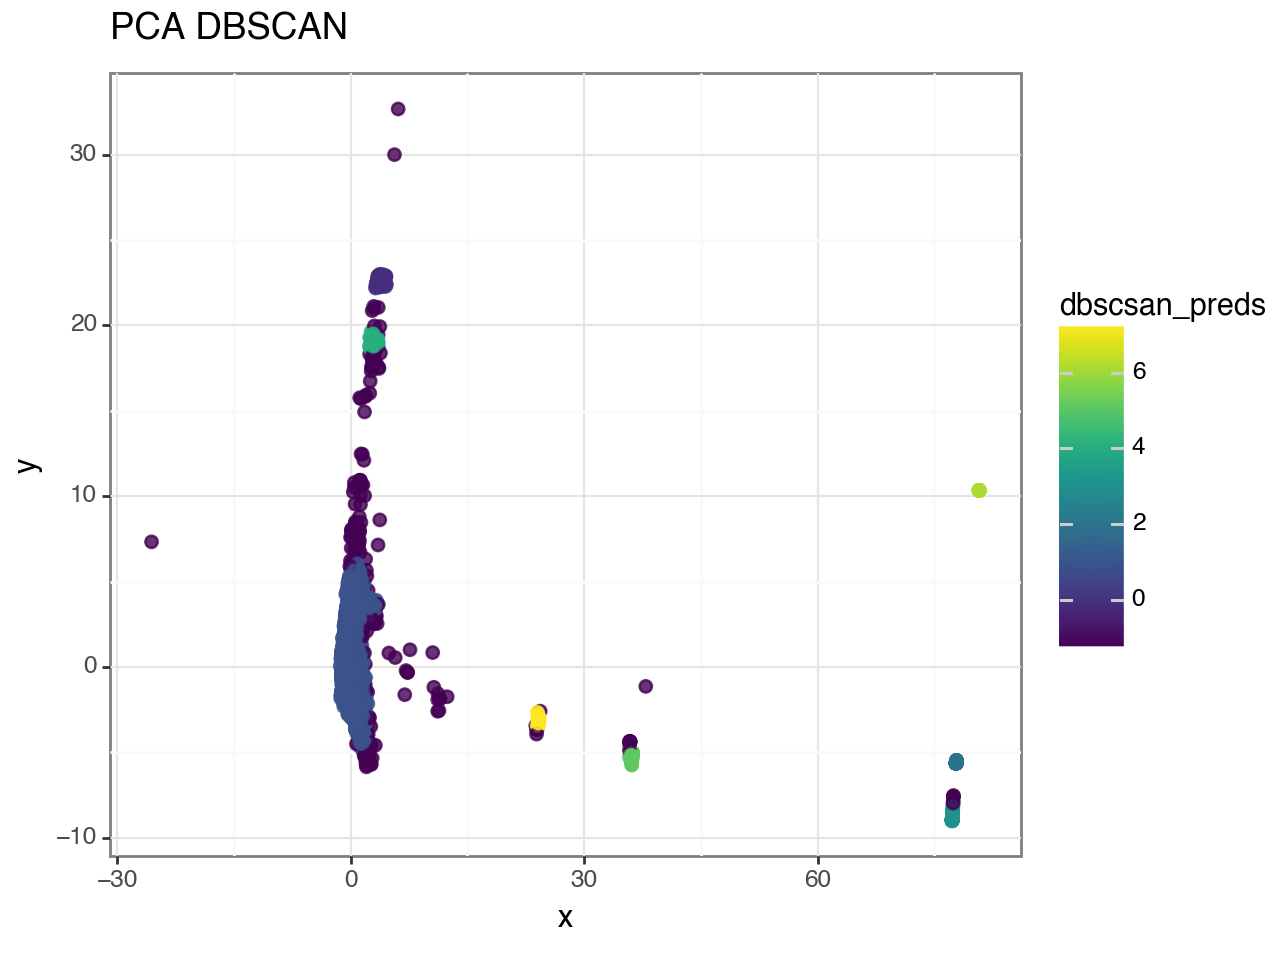

<Figure Size: (640 x 480)>

In [33]:
PCA_data = pd.DataFrame()
PCA_data['x'] = principalComponents[:,0]
PCA_data['y'] = principalComponents[:,1]

PCA_dbscan_clusterer = DBSCAN(eps=0.3, min_samples=10).fit(PCA_data)

PCA_kmeans_clusterer = KMeans(n_clusters=num_clusters_1, init='k-means++',
                        verbose=0, random_state=random_state,
                        algorithm='auto').fit(PCA_data)


PCA_data["dbscsan_preds"] = PCA_dbscan_clusterer.labels_
PCA_data["kmeans_preds"] = PCA_kmeans_clusterer.labels_

dbscan_pca = (p9.ggplot(PCA_data, p9.aes(x='x', y='y', fill='dbscsan_preds', color='dbscsan_preds'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle('PCA DBSCAN')
      + p9.theme_bw())

kmeans_pca = (p9.ggplot(PCA_data, p9.aes(x='x', y='y', fill='kmeans_preds', color='kmeans_preds'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle('PCA Kmeans')
      + p9.theme_bw())

dbscan_pca

In [34]:
len(set(PCA_dbscan_clusterer.labels_))

9

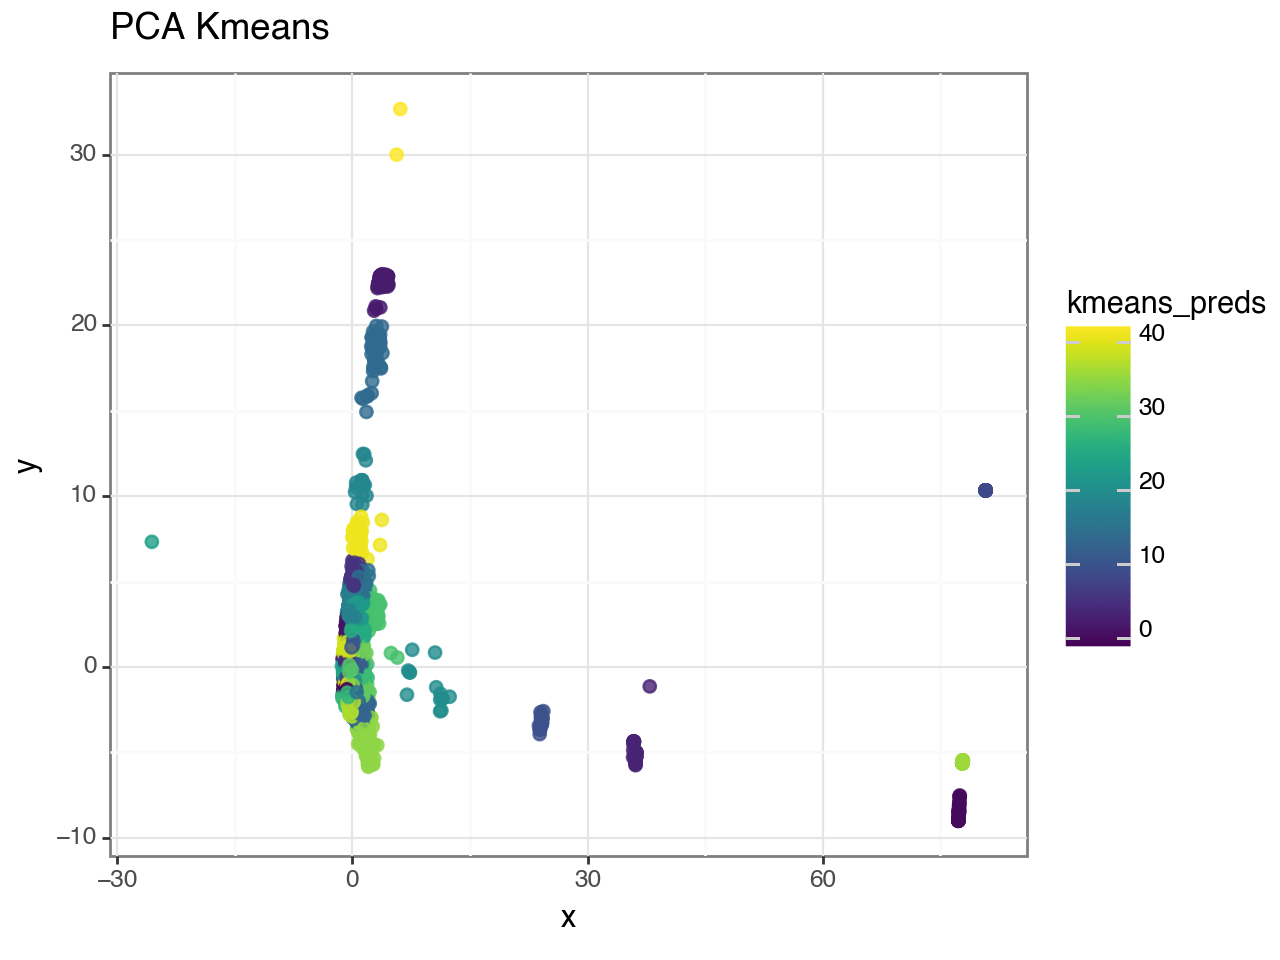

<Figure Size: (640 x 480)>

In [35]:
kmeans_pca

### KModes

In [5]:
# —É–º–µ–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–∞—Ç —Ñ–∏—á–∞–º–∏
cat_num = pd.read_csv('../data/cat_num.csv')

In [6]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

cat_cols = cat_num.select_dtypes(include='object')
categorical_indices = column_index(cat_num, cat_cols.columns)
categorical = list(categorical_indices)

In [7]:
%%time
kproto = KModes(n_clusters=45, init='Cao', verbose=0)
clusters = kproto.fit_predict(cat_num, categorical=categorical)

CPU times: user 8min 29s, sys: 2.76 s, total: 8min 32s
Wall time: 8min 41s


In [17]:
UMAP_2D_data = pd.read_csv('../data/UMAP_2D_data.csv')
UMAP_2D_data.sample()

x         y
34862  0.155387  0.724539

In [18]:
UMAP_2D_data["kmode_preds"] = clusters

In [20]:
kmode_plot = (p9.ggplot(UMAP_2D_data, p9.aes(x='x', y='y', fill='kmode_preds', color='kmode_preds'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle('UMAP KModes')
      + p9.theme_bw())

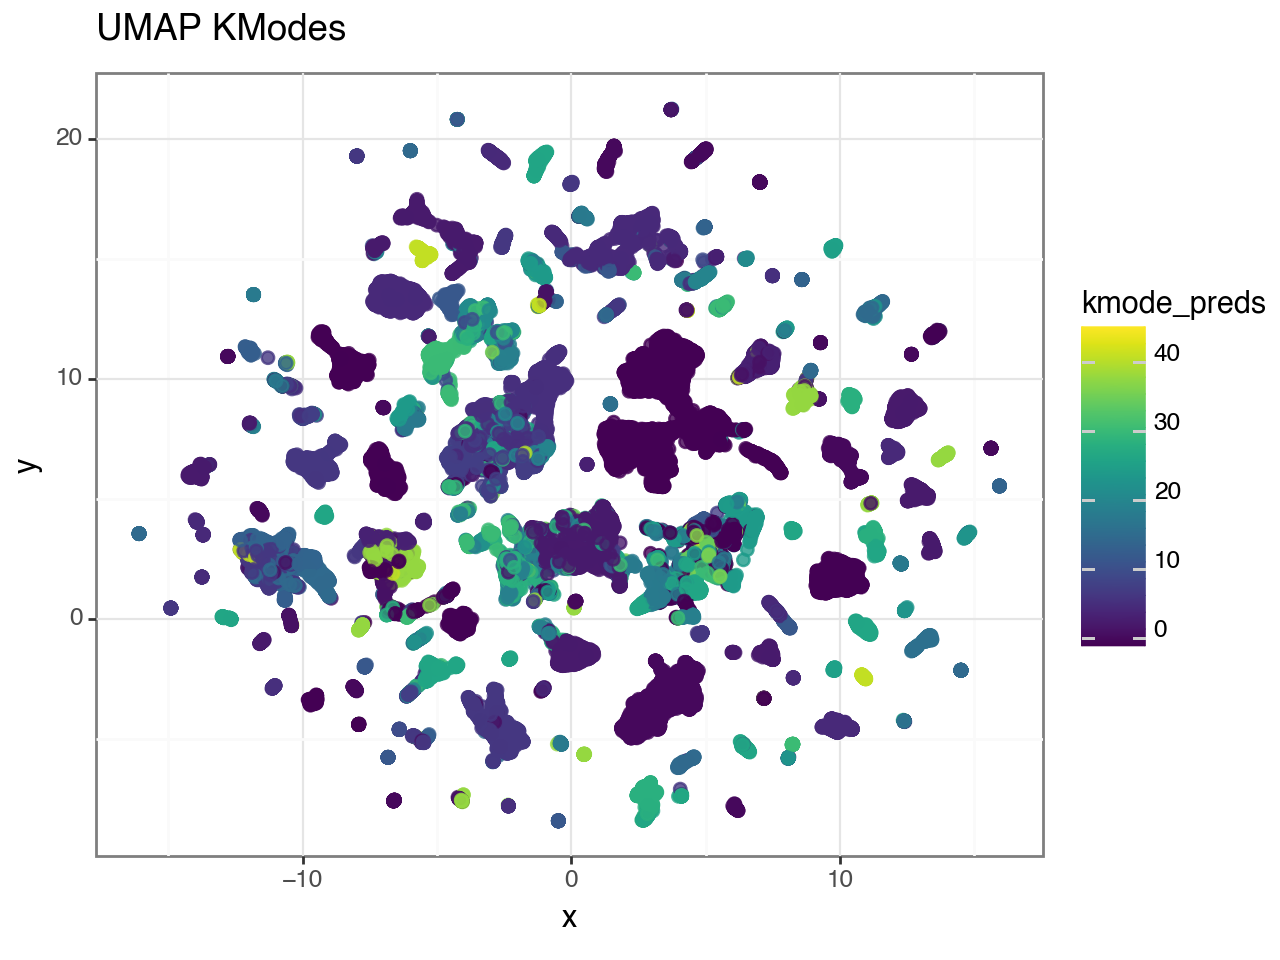

<Figure Size: (640 x 480)>

In [21]:
kmode_plot

### Gower Distance 

**–Ω–µ –¥–æ—Å—á–∏—Ç–∞–ª–æ—Å—å** ü´§

In [22]:
# —É–º–µ–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–∞—Ç —Ñ–∏—á–∞–º–∏
def calculate_gower_distance(df):
  
  '''
  Takes a dataframe as an input and returns the gower distance
  matrix.
  
  '''

  variable_distances = []
  
  for col in range(df.shape[1]):
    
    feature = df.iloc[:,[col]]
    if feature.dtypes.values == object:
      
      feature_dist = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(feature, drop_first=True))
        
    else:
      
      feature_dist = DistanceMetric.get_metric('manhattan').pairwise(feature) / max(np.ptp(feature.values),1)


      variable_distances.append(feature_dist)
      

  return np.array(variable_distances).mean(0)

In [4]:
# TODO: –∑–∞–ø—É—Å—Ç–∏—Ç—å –ø–æ–∑–∂–µ 

In [ ]:
%%time 
gower_data = pd.read_csv('../data/cat_num.csv')
gower_distance_matrix = calculate_gower_distance(gower_data)

In [ ]:
gower_distance_matrix

In [ ]:
%%time 
umap_embeddings = umap.UMAP(random_state=42, n_components=2).fit_transform(gower_distance_matrix)

gower_data['x'] = umap_embeddings[:,0]
gower_data['y'] = umap_embeddings[:,1]

In [ ]:
num_clusters = 42
# gower_clusterer = KMedoids(n_clusters=num_clusters, metric='precomputed',
#                            method='pam', init='build', 
#                            max_iter=300, random_state=random_state).fit(gower_distance_matrix)

gower_clusterer = KMedoids(n_clusters=num_clusters, metric='precomputed',
                           method='pam', init='build', 
                           max_iter=300, random_state=random_state).fit(gower_distance_matrix)
# kmedoids.pam(diss, medoids, max_iter=100, init='build', random_state=None)

In [ ]:
gower_data["preds"] = gower_clusterer.labels_

In [ ]:
gower_d = (p9.ggplot(gower_data, p9.aes(x='x', y='y', fill='preds', color='preds'))
      + p9.geom_point(alpha=0.8, size=2)
      + p9.ggtitle('Gower Matrix UMAP 2D KMedoids')
      + p9.theme_bw())

gower_d